# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [2]:
# Set working directory
%cd C:/Users/sriha/OneDrive/Desktop/DS/My work/life-expectancy

# Unpickle preprocessed training data
X_train = pd.read_pickle('Data/X_train_clean.pkl')

# Unpickle train target variable
y_train = pd.read_pickle('Data/y_train.pkl')

C:\Users\sriha\OneDrive\Desktop\DS\My work\life-expectancy


In [3]:
# Combine X and y for visualization and to determine correlations
df_train = X_train.join(y_train)
df_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
615,Congo,2008,Developing,338.0,8.0,2.58,0.000000,73.0,2,11.0,...,2.90,79.0,4.3,1598.782861,1558177.0,8.4,8.0,0.527,10.0,59.4
2909,Zambia,2012,Developing,349.0,29.0,2.59,196.915250,78.0,896,43.0,...,4.91,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3,59.2
2812,Uruguay,2013,Developing,117.0,1.0,5.82,482.803945,94.0,0,1.0,...,8.68,94.0,0.1,16881.256800,3485.0,1.5,1.4,0.788,15.5,76.8
1825,Nepal,2003,Developing,22.0,38.0,0.20,2.790965,2.0,13344,50.0,...,5.48,78.0,0.1,253.724120,2495623.0,18.0,18.6,0.457,9.2,64.3
497,Canada,2014,Developing,65.0,2.0,8.10,102.190217,55.0,418,2.0,...,1.45,91.0,0.1,544.433760,35544564.0,0.5,0.5,0.912,15.9,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Comoros,2008,Developing,255.0,2.0,0.12,93.367890,81.0,0,2.0,...,5.13,81.0,0.1,795.975190,657229.0,7.2,7.1,0.461,10.2,61.0
1601,Malaysia,2000,Developing,149.0,4.0,0.54,23.371672,97.0,6187,5.0,...,3.40,98.0,0.1,445.174710,2318568.0,9.8,9.6,0.715,11.6,72.4
1363,Kenya,2014,Developing,255.0,56.0,0.01,170.962662,92.0,354,79.0,...,5.72,92.0,2.9,1335.645800,462425.0,7.8,7.7,0.546,11.1,62.9
1549,Luxembourg,2004,Developed,92.0,0.0,12.42,12372.051880,94.0,0,0.0,...,8.20,99.0,0.1,75716.351800,45895.0,1.0,0.9,0.867,13.5,78.7


# Define Function to Visualize Data

In [4]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['Life expectancy '].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.distplot(data[column])
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='Life expectancy ', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'Life expectancy ', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Life expectancy ', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()


def heatmap(corr_matrix):
  sns.clustermap(corr_matrix,
                 annot=False,
                 cmap='Blues')
  plt.show()

# Visualizations and Observations

### 1. Some expected trends:

- Life expectancy is _inversely correlated_ with **adult mortality**, **infant mortality**, **under-five deaths**, as well as **incidence of HIV/AIDS and measles**.

- **Thinness in children and teenagers** is also _inversely correlated_ with life expectancy. This also tells us that thinness here could indicate lack of access to adequate nutrtion. 

- Life expectancy is _directly corelated_, to varying degrees, with **expenditure on healthcare**, **GDP**, **level of schooling** and **immunization against hepatitis B, polio and diptheria**. 

- Life expectancy tends to be _higher_ in developed countries. 


### 2. An unexpected result:

- Life expectancy is _directly correlated_ (albeit very weakly) with **net alcohol consumption per capita**. The expectation would be that alcohol consumption reduces life expectancy, but maybe there is more to it than a simple correlation. 

### 3. Correlations:

- Many of the features only seem to be _weakly_ correlated to the _target variable_. This gives us a starting point to decide whether to later drop some of these features.

- On the other hand, some features are very _strongly_ correlated with _each other_. These will need to be accounted for to avoid multicollinearity. 


### 4. Observations on frequency distributions:

- Several features are skewed. Since we aim for minimum skew and a normal distribution we will attempt to normalize these features. 

- Features with left-skew: **'Hepatits B'**, **'Polio'**, **'Diptheria'**

- Features with right-skew: **'Adult mortality'**, **'Infant deaths**', **'Under-Five deaths'**, **'Alcohol'**, **'Percentage expediture'**, **'Measles'**, **'HIV/AIDS'**, **'GDP'**, **'Thinness 1-19'**, **'Thinness 5-9'**.

- All the skewed features will need to be normalized before proceeding. 
 
- **Note:** The target feature 'Life expectancy' also has a slight skew, and we may choose to normalize this. This will have to be reversed before the final predictions are made. 

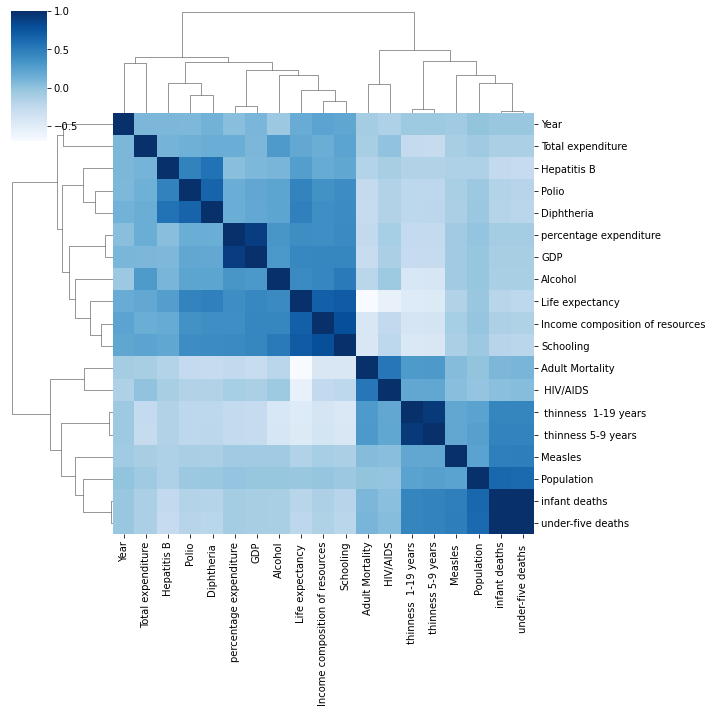

In [5]:
corr1 = df_train.corr()
heatmap(corr1)

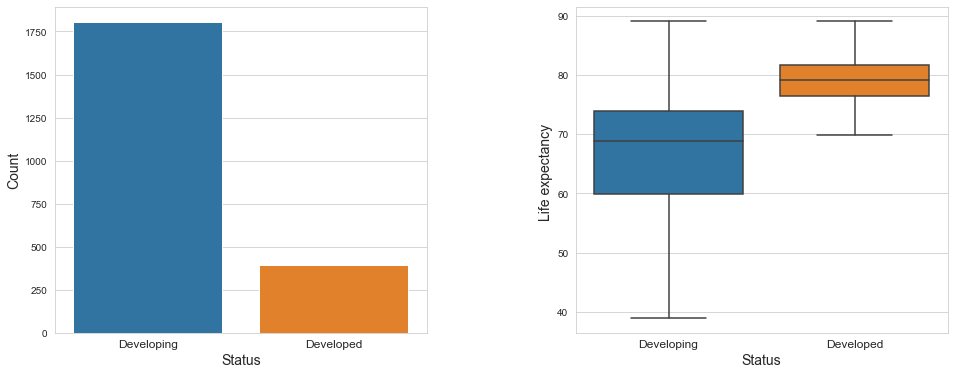

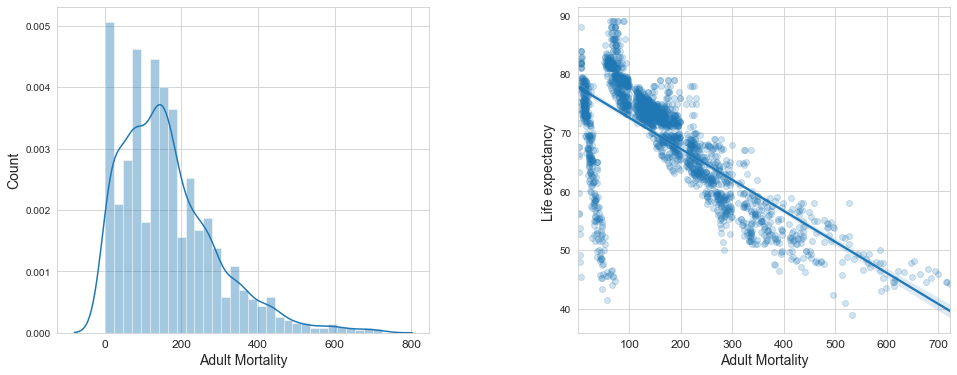

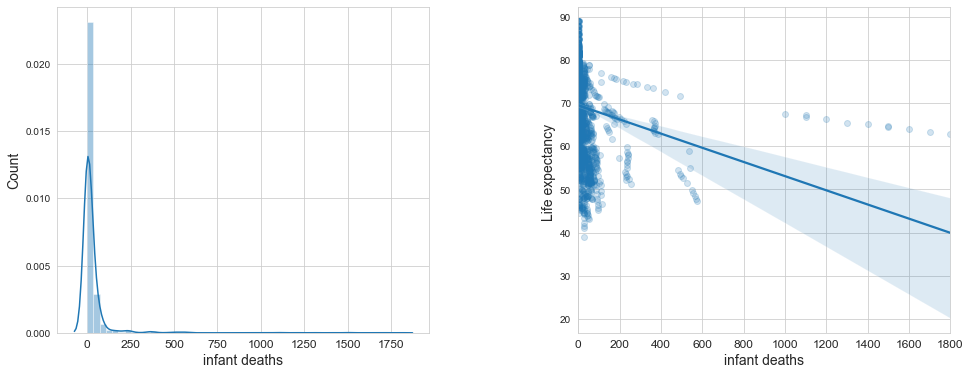

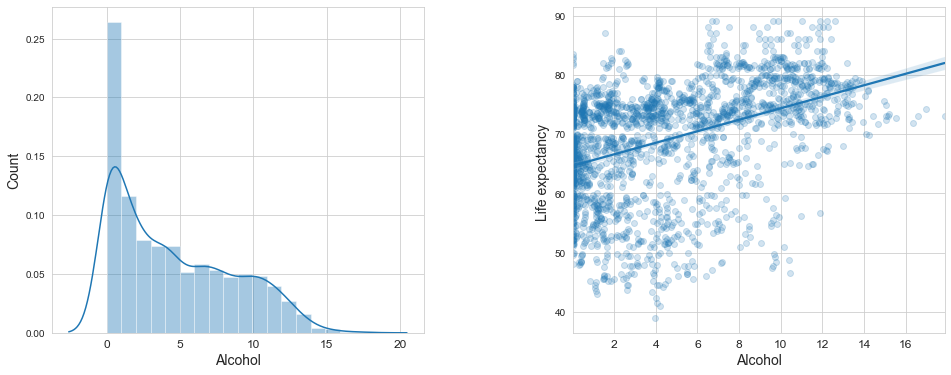

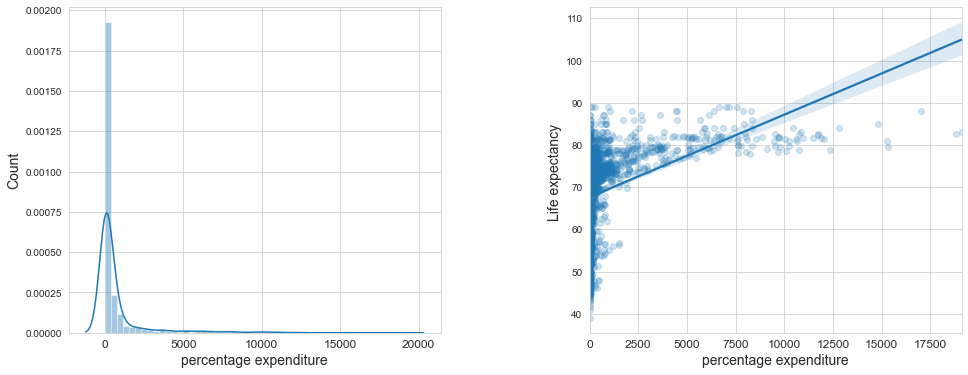

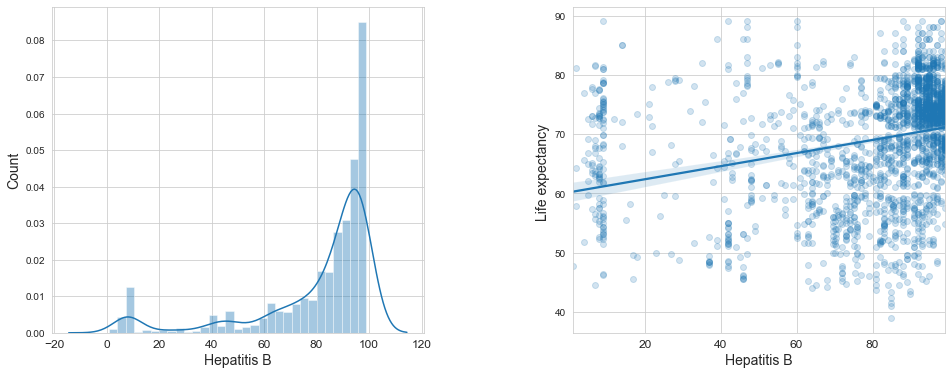

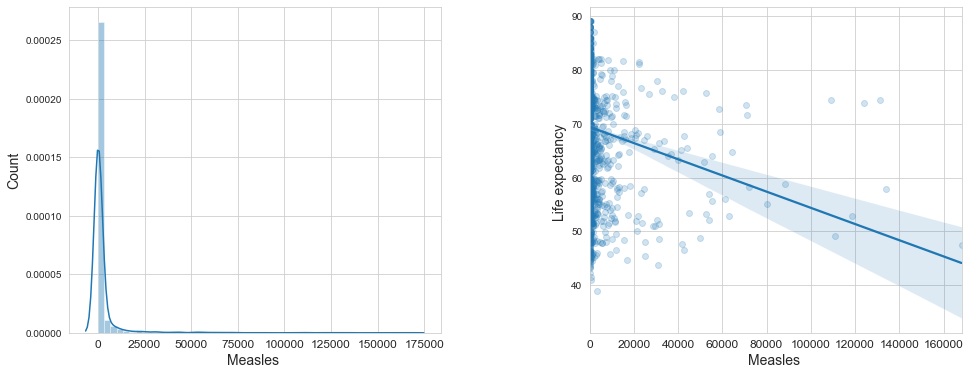

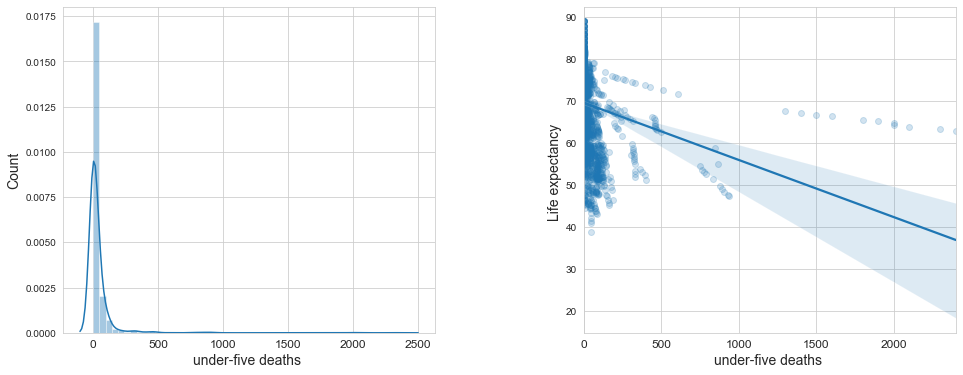

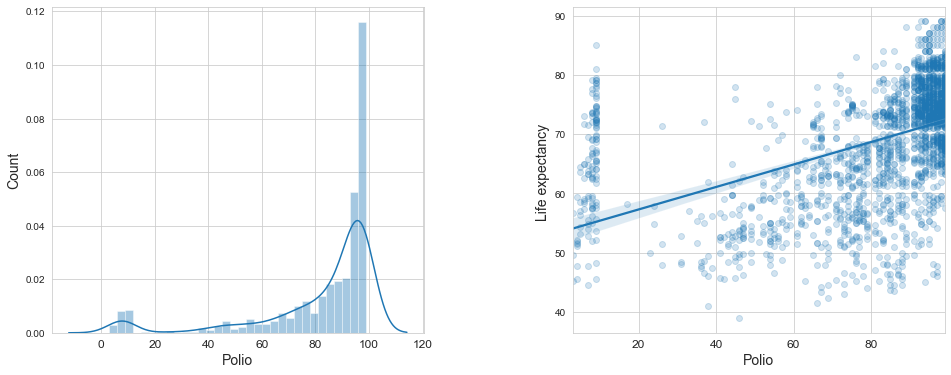

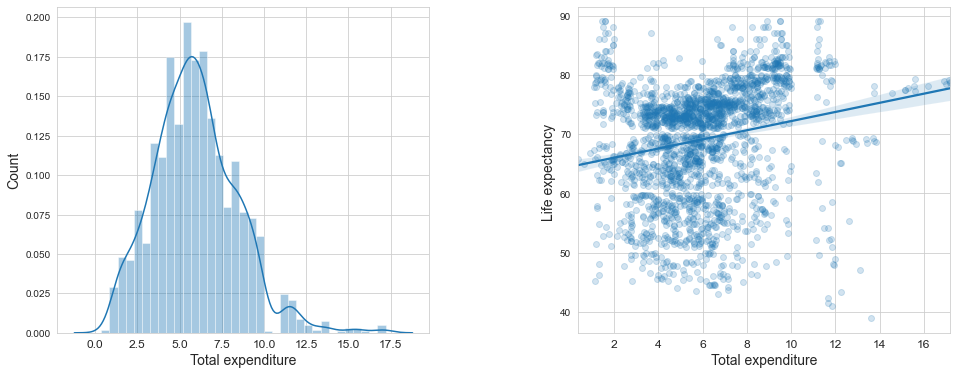

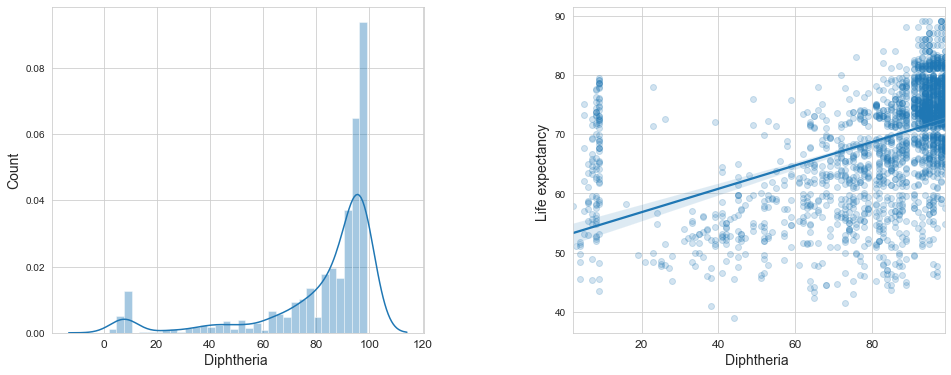

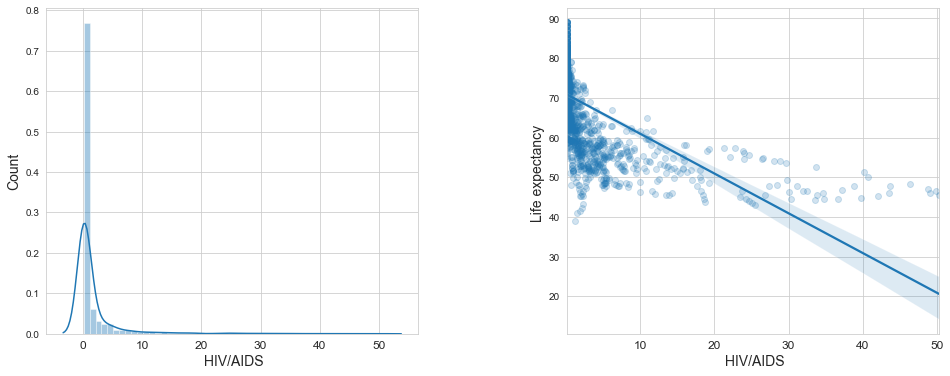

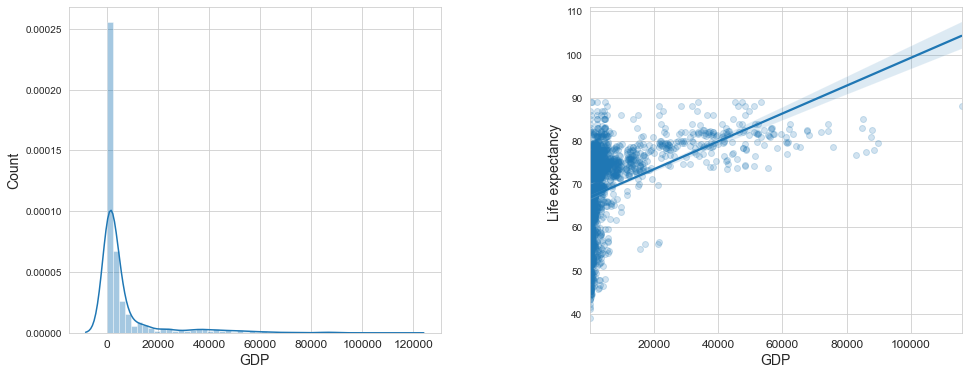

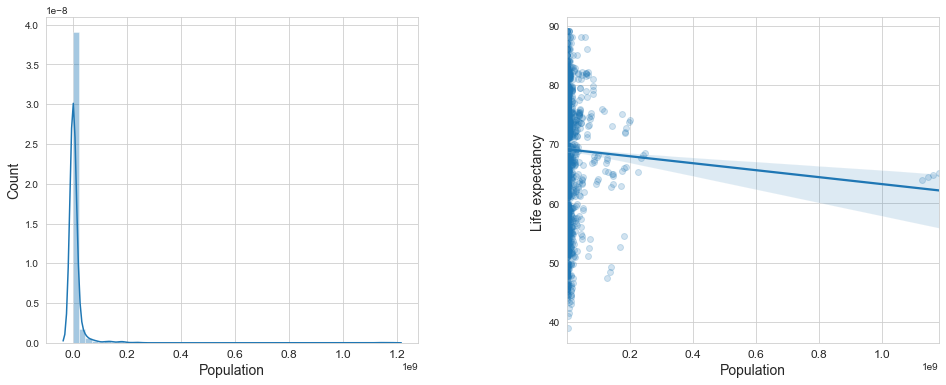

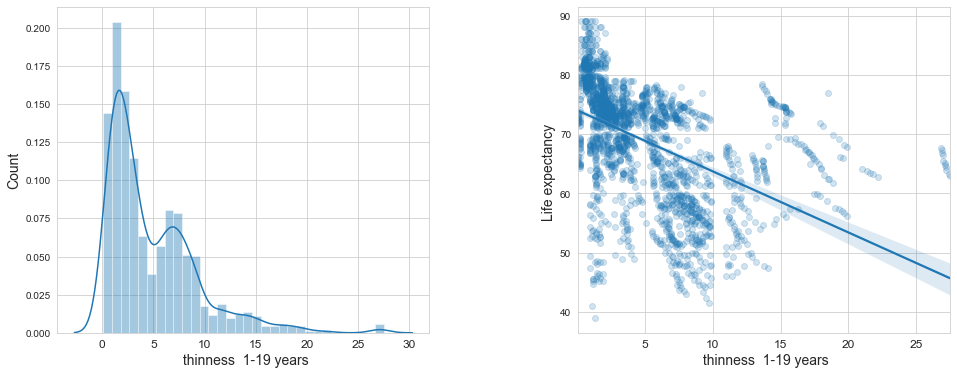

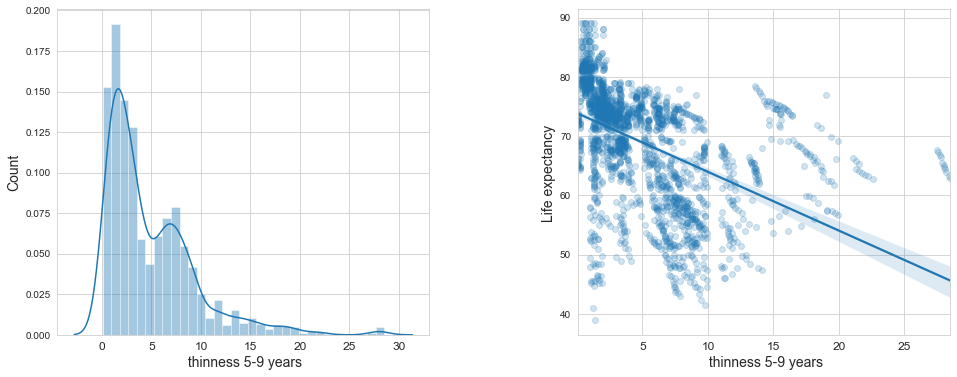

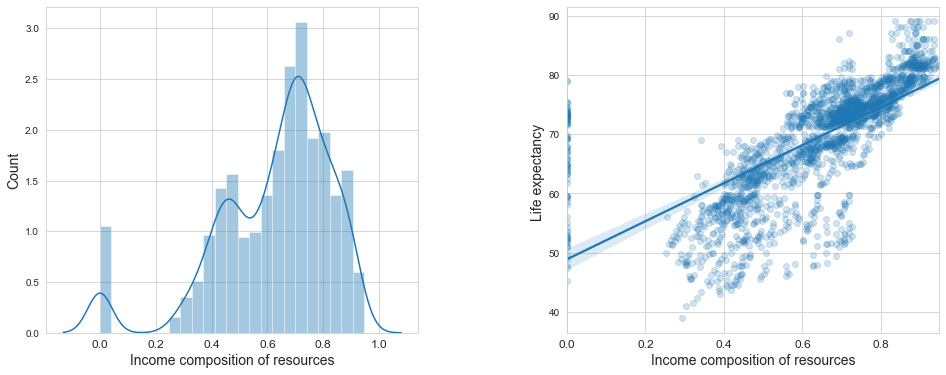

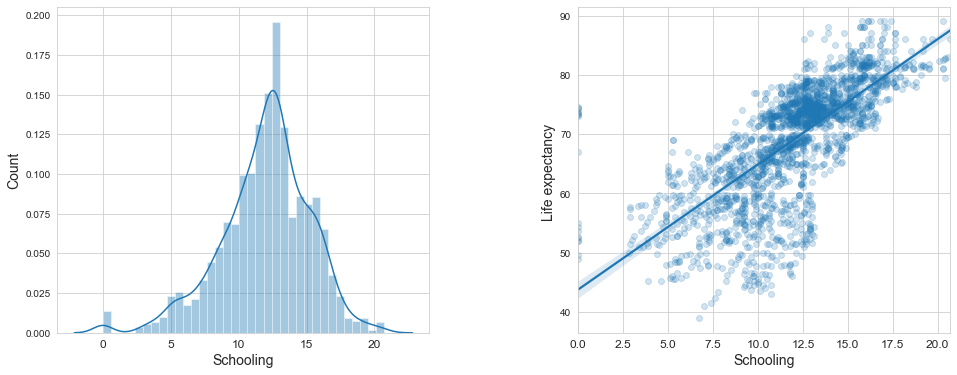

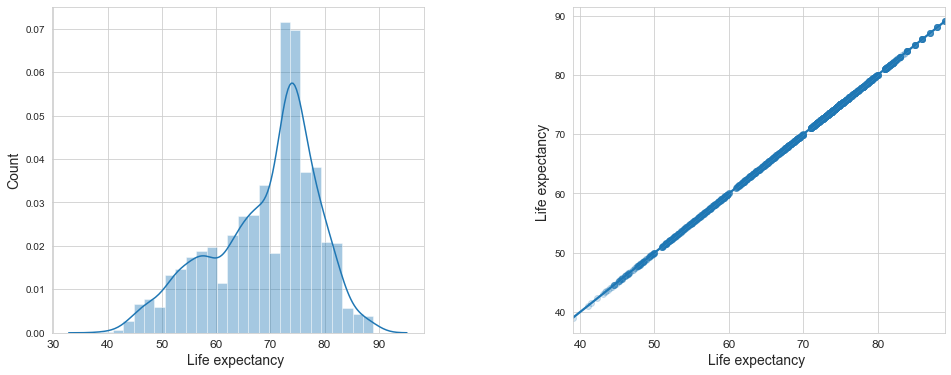

In [6]:
for column in df_train.columns[2:]:#len(df_train.columns)-1]:
    plot_feature(df_train, column)